In [ ]:
import datetime
import math
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import zipfile
import requests
import re
import tensorflow as tf

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
font = {'fontname': 'Helvetica'}
import matplotlib as mpl
import matplotlib.patheffects as path_effects

# import and load model architectures as well as decoder
from models.cueva import LSTM_FE
from models.llanes_jurado import LSTM_CNN
from utilities.preprocessors import correct_signals, attach_label_to_number
from utilities.loaders import load_meta_data, load_model, load_lookup_array, charge_raw_data, _combine_data, save_lookup_array

from utilities.visualizers import (
    view_time_frame,
    view_wavelet_coeffs,
    analyze,
    data_split_metric_values,
    view_value_frequency,
    multi_class_heatmap,
    view_metric_values,
    view_classified_labels,
    view_label_freq,
    disp_cat_feat,
    plot_all_features,
    describe_col,
    ModelResults,
    view_all_splits_results)

from utilities.feature_extractors import (
    concur_extract_features_from_all,
    extract_features,
    extract_features_hybrid,
    extract_features_per_hour)

%load_ext autoreload
%autoreload 2

In [45]:
sample_models = {
    'cueva_second_phase-svm':{
        'train_results': [
            ('ahixac_expert1', {
                'train_acc': 0.9764,
                'train_prec': 0.9764,
                'train_rec': 0.9764,
                'train_f1': 0.9764,
                'train_roc_auc': 0.8764,
            }),
            ('akakip_expert1', {
                'train_acc': 0.9764,
                'train_prec': 0.9764,
                'train_rec': 0.9764,
                'train_f1': 0.9764,
                'train_roc_auc': 0.7764,
            }),
        ],
        'test_results': [
            ('pqbqpr_expert2', {
                'test_acc': 0.9764,
                'test_prec': 0.9764,
                'test_rec': 0.9764,
                'test_f1': 0.9764,
                'test_roc_auc': 0.8764,
            }),
            ('oxused_expert2', {
                'test_acc': 0.9764,
                'test_prec': 0.9764,
                'test_rec': 0.9764,
                'test_f1': 0.9764,
                'test_roc_auc': 0.6764,
            }),
            ('subject3', {
                'test_acc': 0.9764,
                'test_prec': 0.9764,
                'test_rec': 0.9764,
                'test_f1': 0.9764,
                'test_roc_auc': 0.6764,
            }),
            ('subject4', {
                'test_acc': 0.9764,
                'test_prec': 0.9764,
                'test_rec': 0.9764,
                'test_f1': 0.9764,
                'test_roc_auc': 0.6764,
            }),
            ('subject5', {
                'test_acc': 0.9764,
                'test_prec': 0.9764,
                'test_rec': 0.9764,
                'test_f1': 0.9764,
                'test_roc_auc': 0.6764,
            }),
            ('subject6', {
                'test_acc': 0.9764,
                'test_prec': 0.9764,
                'test_rec': 0.9764,
                'test_f1': 0.9764,
                'test_roc_auc': 0.6764,
            }),
            ('subject7', {
                'test_acc': 0.9764,
                'test_prec': 0.9764,
                'test_rec': 0.9764,
                'test_f1': 0.9764,
                'test_roc_auc': 0.6764,
            }),
        ]
    },
    'cueva-lstm-fe': {
        # 'model':
        # 'hyper_params':
    },
    'jurado-lstm-cnn': {
        # 'model':
        # 'hyper_params':
    },
    'taylor-svm': {
        # 'model':
        # 'selected_feats':
    },
    'taylor-lr': {
        # 'model':
        # 'selected_feats':
    },
    'taylor-rf': {
        # 'model':
        # 'selected_feats':
    },
    'hossain-gbt': {
        # 'model':
        # 'selected_feats':
        # 'scaler':
    },
    'hossain-svm': {
        # 'model':
        # 'selected_feats':
        # 'scaler':
    },
    'hossain-lr': {
        # 'model':
        # 'selected_feats':
        # 'scaler':
    }
}

In [ ]:
models = load_meta_data('./results/all_models_results.json')
models

In [47]:
del models['cueva_second_phase-1-5-weighted-svm']
del models['cueva_second_phase-1-9-weighted-svm']
del models['cueva_second_phase-1-2-weighted-svm']

# Rename keys

In [48]:
models["cueva-C_1_gamma_0p1_svm"] = models.pop("cueva_second_phase-C_1_gamma_0p1_probability_True_class_weight_None_svm")
models["cueva-C_1_gamma_0p5_svm"] = models.pop("cueva_second_phase-C_1_gamma_0p5_probability_True_class_weight_None_svm")
models["cueva-C_1_gamma_1_svm"] = models.pop("cueva_second_phase-C_1_gamma_1_probability_True_class_weight_None_svm")
models["cueva-C_10_gamma_0p1_svm"] = models.pop("cueva_second_phase-C_10_gamma_0p1_probability_True_class_weight_None_svm")
models["cueva-C_10_gamma_0p5_svm"] = models.pop("cueva_second_phase-C_10_gamma_0p5_probability_True_class_weight_None_svm")
models["cueva-C_10_gamma_1_svm"] = models.pop("cueva_second_phase-C_10_gamma_1_probability_True_class_weight_None_svm")
models["cueva-C_100_gamma_0p1_svm"] = models.pop("cueva_second_phase-C_100_gamma_0p1_probability_True_class_weight_None_svm")
models["cueva-C_100_gamma_0p5_svm"] = models.pop("cueva_second_phase-C_100_gamma_0p5_probability_True_class_weight_None_svm")
models["cueva-C_100_gamma_1_svm"] = models.pop("cueva_second_phase-C_100_gamma_1_probability_True_class_weight_None_svm")

models["hossain-C_1_gamma_1_svm"] = models.pop("hossain-C_1_gamma_1_probability_True_class_weight_None_svm")
models["hossain-C_1_gamma_0p1_svm"] = models.pop("hossain-C_1_gamma_0p1_probability_True_class_weight_None_svm")
models["hossain-C_1_gamma_0p01_svm"] = models.pop("hossain-C_1_gamma_0p01_probability_True_class_weight_None_svm")
models["hossain-C_1_gamma_0p001_svm"] = models.pop("hossain-C_1_gamma_0p001_probability_True_class_weight_None_svm")
# models["hossain-C_10_gamma_1_svm"] = models.pop("hossain-C_10_gamma_1_probability_True_class_weight_None_svm")
models["hossain-C_10_gamma_0p1_svm"] = models.pop("hossain-C_10_gamma_0p1_probability_True_class_weight_None_svm")
models["hossain-C_10_gamma_0p01_svm"] = models.pop("hossain-C_10_gamma_0p01_probability_True_class_weight_None_svm")
models["hossain-C_10_gamma_0p001_svm"] = models.pop("hossain-C_10_gamma_0p001_probability_True_class_weight_None_svm")
# models["hossain-C_100_gamma_1_svm"] = models.pop("hossain-C_100_gamma_1_probability_True_class_weight_None_svm")
# models["hossain-C_100_gamma_0p1_svm"] = models.pop("hossain-C_100_gamma_0p1_probability_True_class_weight_None_svm")
models["hossain-C_100_gamma_0p01_svm"] = models.pop("hossain-C_100_gamma_0p01_probability_True_class_weight_None_svm")
models["hossain-C_100_gamma_0p001_svm"] = models.pop("hossain-C_100_gamma_0p001_probability_True_class_weight_None_svm")
# models["hossain-C_1000_gamma_1_svm"] = models.pop("hossain-C_1000_gamma_1_probability_True_class_weight_None_svm")
# models["hossain-C_1000_gamma_0p1_svm"] = models.pop("hossain-C_1000_gamma_0p1_probability_True_class_weight_None_svm")
# models["hossain-C_1000_gamma_0p01_svm"] = models.pop("hossain-C_1000_gamma_0p01_probability_True_class_weight_None_svm")
models["hossain-C_1000_gamma_0p001_svm"] = models.pop("hossain-C_1000_gamma_0p001_probability_True_class_weight_None_svm")

models["taylor-C_1_gamma_1_svm"] = models.pop("taylor-C_1_gamma_1_probability_True_class_weight_None_svm")
models["taylor-C_1_gamma_0p1_svm"] = models.pop("taylor-C_1_gamma_0p1_probability_True_class_weight_None_svm")
models["taylor-C_1_gamma_0p01_svm"] = models.pop("taylor-C_1_gamma_0p01_probability_True_class_weight_None_svm")
models["taylor-C_1_gamma_0p001_svm"] = models.pop("taylor-C_1_gamma_0p001_probability_True_class_weight_None_svm")
# models["taylor-C_10_gamma_1_svm"] = models.pop("taylor-C_10_gamma_1_probability_True_class_weight_None_svm")
models["taylor-C_10_gamma_0p1_svm"] = models.pop("taylor-C_10_gamma_0p1_probability_True_class_weight_None_svm")
models["taylor-C_10_gamma_0p01_svm"] = models.pop("taylor-C_10_gamma_0p01_probability_True_class_weight_None_svm")
models["taylor-C_10_gamma_0p001_svm"] = models.pop("taylor-C_10_gamma_0p001_probability_True_class_weight_None_svm")
# models["taylor-C_100_gamma_1_svm"] = models.pop("taylor-C_100_gamma_1_probability_True_class_weight_None_svm")
models["taylor-C_100_gamma_0p1_svm"] = models.pop("taylor-C_100_gamma_0p1_probability_True_class_weight_None_svm")
models["taylor-C_100_gamma_0p01_svm"] = models.pop("taylor-C_100_gamma_0p01_probability_True_class_weight_None_svm")
models["taylor-C_100_gamma_0p001_svm"] = models.pop("taylor-C_100_gamma_0p001_probability_True_class_weight_None_svm")
# models["taylor-C_1000_gamma_1_svm"] = models.pop("taylor-C_1000_gamma_1_probability_True_class_weight_None_svm")
models["taylor-C_1000_gamma_0p1_svm"] = models.pop("taylor-C_1000_gamma_0p1_probability_True_class_weight_None_svm")
# models["taylor-C_1000_gamma_0p01_svm"] = models.pop("taylor-C_1000_gamma_0p01_probability_True_class_weight_None_svm")
models["taylor-C_1000_gamma_0p001_svm"] = models.pop("taylor-C_1000_gamma_0p001_probability_True_class_weight_None_svm")

# Visualization
#### what I want is across each model see accuracy for all subjects in train and test set i.e. a figure will show taylor's svm accuracy across all train and test subjects
- have the x ticks be labeled as the subject names
- have the y ticks be labeled as the percentage value of the accuracy or roc  
- the title for the plot will be for instance `taylor svm train accuracy results.png`, and the general title would be `{selector_config} {estimator_name} {data_split} {metric} results.png`

![sample results chart.png](../../sample%20results%20chart.png)

In [25]:
models = models

In [26]:
# data = [(subject_name, result['test_roc_auc']) for (subject_name, result) in models['cueva_second_phase-svm']['test_results']]
# data

In [27]:
# x_ticks, y_ticks = list(zip(*data))
# x_ticks, y_ticks

In [28]:
# cmap = mpl.colormaps['mako']
# fig = plt.figure(figsize=(15, 10))
# axis = fig.add_subplot()

# bar = axis.bar(x_ticks, y_ticks, color=cmap(np.linspace(0, 1, len(data))), edgecolor='white', linewidth=0.125)
# axis.bar_label(bar, fmt='{:.4f}')
# axis.set_xlabel('subjects', )
# axis.set_ylabel('score', )
# axis.tick_params(axis='x', labelrotation=45.0)
# axis.set_title('{selector_config} {estimator_name} {data_split} {metric} results')
# plt.show()

In [29]:
def view_subjects_results(data, selector_config: str, estimator_name: str, data_split: str="train", metric: str="acc", colormap: str="plasma", save_img: bool=True, style: str='default'):
    """
    suitable for all discrete input

    plots either a horizontal bar graph to display frequency of words top 'limit' 
    words e.g. top 20 or a pie chart to display the percentages of the top 'limit' 
    words e.g. top 20, specified by the argument kind which can be either
    strings barh or pie

    main args:
        data - list of tuples representing the subject and the subjects respective score
        selector_config - 
        estimator_name - 
        data_split - 
        metric - 
        colormap - 
        save_img - 
        style - 
    """

    # compose title based on selector_config, estimator_name, data_split, and metric args
    title = f'{selector_config} {estimator_name} {data_split} {metric} results'

    # sort data according to x_tick value or the subject name in ascending order
    data = sorted(data, key=lambda datum: datum[0], reverse=False)

    # extract x and y values from data
    x_ticks, y_ticks = list(zip(*data))

    styles = {
        'dark': 'dark_background',
        'solarized': 'Solarized_Light2',
        '538': 'fivethirtyeight',
        'ggplot': 'ggplot',
    }

    plt.style.use(styles.get(style, 'default'))

    # define figure
    cmap = mpl.colormaps[colormap]
    fig = plt.figure(figsize=(15, 10))
    axis = fig.add_subplot()

    # plot bar graph
    bar = axis.bar(x_ticks, y_ticks, color=cmap(np.linspace(0, 1, len(data))), edgecolor='white', linewidth=0.125)
    axis.bar_label(bar, fmt='{:.4f}')
    axis.set_xlabel('subjects', )
    axis.set_ylabel(f'{metric} score', )
    axis.tick_params(axis='x', labelrotation=45.0)
    axis.set_title(title)
    
    if save_img:
        save_dir = f"./figures & images/{selector_config} {estimator_name}"
        os.makedirs(save_dir, exist_ok=True)

        file_path = os.path.join(save_dir, f"{title}.png")
        print(file_path)
        plt.savefig(file_path)
        plt.show()

In [30]:
def view_subjects_heatmap(data, selector_config: str, estimator_name: str, data_split: str="train", metric: str="acc", colormap: str='YlGnBu', fig_dims: tuple=(4, 2), save_img: bool=True, style: str='dark'):
    """
    takes in the confusion matrix returned by the confusion_matrix()
    function from sklearn e.g. conf_matrix_train = confusion_matrix(
        Y_true_train, Y_pred_train, labels=np.unique(Y_true_train)
    )

    other args:
        cmap - the color map you want the confusion matrix chart to have.
        Other values can be 'flare'

        style - the background of the plot e.g. dark or light
    """
    # compose title based on selector_config, estimator_name, data_split, and metric args
    title = f'{selector_config} {estimator_name} {data_split} {metric} results'

    styles = {
        'dark': 'dark_background',
        'solarized': 'Solarized_Light2',
        '538': 'fivethirtyeight',
        'ggplot': 'ggplot',
    }

    plt.style.use(styles.get(style, 'default'))

    # see where each feature lies
    # sees the range where each feature lies
    first_dim, zeroeth_dim = fig_dims
    fig, axes = plt.subplots(first_dim, zeroeth_dim, figsize=(15, 10))
    fig.tight_layout(pad=1)
    axes_flat = axes.flat

    for index, (subject_name, conf_matrix) in enumerate(data):
        print(subject_name, conf_matrix)

        sb.heatmap(conf_matrix, cmap=colormap, annot=True, fmt='g', ax=axes_flat[index])
        axes_flat[index].set_title(f'{subject_name} confusion matrix')

    if save_img:
        fig.suptitle(title)

        save_dir = f"./figures & images/{selector_config} {estimator_name}"
        os.makedirs(save_dir, exist_ok=True)
        file_path = os.path.join(save_dir, f"{title}.png")
        
        plt.savefig(file_path)
        plt.show()

In [31]:
def view_subject_heatmap(subject_result,
    selector_config: str,
    estimator_name: str,
    data_split: str="train",
    metric: str="acc",
    colormap: str='YlGnBu',
    fig_dims: tuple=(4, 2),
    save_img: bool=True,
    style: str='dark'):
    """
    displays subjects confusion matrix individually as opposed to
    placing confusion matrices of all subjects in a table
    """
    subject_name, subject_conf_matrix = subject_result
    
    # compose title based on selector_config, estimator_name, data_split, and metric args
    title = f"{subject_name} {selector_config} {estimator_name} {data_split} {metric} results"
    print(title)

    styles = {
        'dark': 'dark_background',
        'solarized': 'Solarized_Light2',
        '538': 'fivethirtyeight',
        'ggplot': 'ggplot',
    }

    plt.style.use(styles.get(style, 'default'))
    classes = ['non-artifact', 'artifact']
    labeled_conf_matrix = attach_label_to_number(conf_matrix=subject_conf_matrix)
    print(labeled_conf_matrix)
    axis = sb.heatmap(subject_conf_matrix, cmap=colormap, annot=True, fmt='g', xticklabels=classes, yticklabels=classes, cbar=True)

    # Add custom labels
    for i in range(labeled_conf_matrix.shape[0]):
        for j in range(labeled_conf_matrix.shape[1]):
            text = axis.text(j + 0.5, i + 0.375, labeled_conf_matrix[i, j], color="white", ha="center", va="center")
            text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                       path_effects.Normal()])
    axis.set_title(title)

    if save_img:
        # save_dir = f"./figures & images/{selector_config} {estimator_name}"
        # print(save_dir)
        # os.makedirs(save_dir, exist_ok=True)
        plt.savefig(f"./figures & images/{selector_config} {estimator_name}/{subject_name} conf_matrix.png")
        plt.show()

In [32]:
model_names = [
    "cueva-C_1_gamma_0p1_svm",
    "cueva-C_1_gamma_0p5_svm",
    "cueva-C_1_gamma_1_svm",
    "cueva-C_10_gamma_0p1_svm",
    "cueva-C_10_gamma_0p5_svm",
    "cueva-C_10_gamma_1_svm",
    "cueva-C_100_gamma_0p1_svm",
    "cueva-C_100_gamma_0p5_svm",
    "cueva-C_100_gamma_1_svm",

    "hossain-n_estimators_200_learning_rate_0p1_max_depth_3_gbt",
    "hossain-n_estimators_200_learning_rate_0p01_max_depth_3_gbt",
    "hossain-n_estimators_200_learning_rate_0p1_max_depth_5_gbt",
    "hossain-n_estimators_200_learning_rate_0p01_max_depth_5_gbt",
    "hossain-n_estimators_200_learning_rate_0p1_max_depth_10_gbt",
    "hossain-n_estimators_200_learning_rate_0p01_max_depth_10_gbt",
    "hossain-n_estimators_400_learning_rate_0p1_max_depth_3_gbt",
    "hossain-n_estimators_400_learning_rate_0p01_max_depth_3_gbt",
    "hossain-n_estimators_400_learning_rate_0p1_max_depth_5_gbt",
    "hossain-n_estimators_400_learning_rate_0p01_max_depth_5_gbt",
    "hossain-n_estimators_400_learning_rate_0p1_max_depth_10_gbt",
    "hossain-n_estimators_400_learning_rate_0p01_max_depth_10_gbt",
    "hossain-n_estimators_600_learning_rate_0p1_max_depth_3_gbt",
    "hossain-n_estimators_600_learning_rate_0p01_max_depth_3_gbt",
    "hossain-n_estimators_600_learning_rate_0p1_max_depth_5_gbt",
    "hossain-n_estimators_600_learning_rate_0p01_max_depth_5_gbt",
    "hossain-n_estimators_600_learning_rate_0p1_max_depth_10_gbt",
    "hossain-n_estimators_600_learning_rate_0p01_max_depth_10_gbt",

    "taylor-n_estimators_600_max_depth_50_class_weight_None_rf",
    "taylor-n_estimators_400_max_depth_50_class_weight_None_rf",
    "taylor-n_estimators_200_max_depth_50_class_weight_None_rf",
    "taylor-n_estimators_600_max_depth_30_class_weight_None_rf",
    "taylor-n_estimators_400_max_depth_30_class_weight_None_rf",
    "taylor-n_estimators_200_max_depth_30_class_weight_None_rf",
    "taylor-n_estimators_600_max_depth_10_class_weight_None_rf",
    "taylor-n_estimators_400_max_depth_10_class_weight_None_rf",
    "taylor-n_estimators_200_max_depth_10_class_weight_None_rf",
    
    "hossain-C_1_gamma_1_svm",
    "hossain-C_1_gamma_0p1_svm",
    "hossain-C_1_gamma_0p01_svm",
    "hossain-C_1_gamma_0p001_svm",
    # "hossain-C_10_gamma_1_svm",
    "hossain-C_10_gamma_0p1_svm",
    "hossain-C_10_gamma_0p01_svm",
    "hossain-C_10_gamma_0p001_svm",
    # "hossain-C_100_gamma_1_svm",
    # "hossain-C_100_gamma_0p1_svm",
    "hossain-C_100_gamma_0p01_svm",
    "hossain-C_100_gamma_0p001_svm",
    # "hossain-C_1000_gamma_1_svm",
    # "hossain-C_1000_gamma_0p1_svm",
    # "hossain-C_1000_gamma_0p01_svm",
    "hossain-C_1000_gamma_0p001_svm",

    "taylor-C_1_gamma_1_svm",
    "taylor-C_1_gamma_0p1_svm",
    "taylor-C_1_gamma_0p01_svm",
    "taylor-C_1_gamma_0p001_svm",
    # "taylor-C_10_gamma_1_svm",
    "taylor-C_10_gamma_0p1_svm",
    "taylor-C_10_gamma_0p01_svm",
    "taylor-C_10_gamma_0p001_svm",
    # "taylor-C_100_gamma_1_svm",
    "taylor-C_100_gamma_0p1_svm",
    "taylor-C_100_gamma_0p01_svm",
    "taylor-C_100_gamma_0p001_svm",
    # "taylor-C_1000_gamma_1_svm",
    "taylor-C_1000_gamma_0p1_svm",
    # "taylor-C_1000_gamma_0p01_svm",
    "taylor-C_1000_gamma_0p001_svm",
    
    "hossain-C_0p01_class_weight_None_lr",
    "hossain-C_0p1_class_weight_None_lr",
    "hossain-C_1_class_weight_None_lr",
    "hossain-C_10_class_weight_None_lr",
    "hossain-C_100_class_weight_None_lr",
    
    "taylor-C_0p01_class_weight_None_lr",
    "taylor-C_0p1_class_weight_None_lr",
    "taylor-C_1_class_weight_None_lr",
    "taylor-C_10_class_weight_None_lr",
    "taylor-C_100_class_weight_None_lr",

    'jurado-lstm-cnn'
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

In [ ]:
for model_name in model_names:
    # extract selector config and estimator name from model name
    selector_config, estimator_name = model_name.split('-', 1)

    for data_split in data_splits:
        for metric in metrics:
            # randomly select colormaps
            sample_idx = np.random.choice(len(colormaps), size=1)[0]
            colormap = colormaps[sample_idx]

            # if metric is confusion matrix plot a confusion matrix graph
            if metric == "conf_matrix":
                # data = [(subject_name, result[f'{data_split}_{metric}']) \
                #     for (subject_name, result) in models[f'{selector_config}-{estimator_name}'][f'{data_split}_results']]
                # fig_dims = (5, 2) if data_split == "test" else (7, 5)
                # view_subject_heatmap(data,
                #     selector_config=selector_config, 
                #     estimator_name=estimator_name,
                #     data_split=data_split,
                #     metric=metric,
                #     colormap=colormap,
                #     fig_dims=fig_dims,
                #     style='dark'
                # )
                for (subject_name, result) in models[f'{selector_config}-{estimator_name}'][f'{data_split}_results']:
                    subject_result = (subject_name, result[f'{data_split}_{metric}'])
                    view_subject_heatmap(
                        subject_result=subject_result,
                        selector_config=selector_config,
                        estimator_name=estimator_name,
                        data_split=data_split,
                        metric=metric,
                        colormap=colormap,
                        style='dark'
                    )
                
            else:
                data = [(subject_name, result[f'{data_split}_{metric}']) \
                    for (subject_name, result) in models[f'{selector_config}-{estimator_name}'][f'{data_split}_results']]
                
                view_subjects_results(data, 
                    selector_config=selector_config, 
                    estimator_name=estimator_name,
                    data_split=data_split,
                    metric=metric,
                    colormap=colormap,
                    style='dark'
                )


## from here we create a graph now that takes the mean value of each metric for each model
![sample results chart.png](../../sample%20averaged%20results%20chart.png)

## So in this case the `x_ticks` would be the `model_names` themselves and the `y_ticks` would be the mean accuracy of each model listed

In [49]:
def view_models_mean_results(data, selector_config: str, estimator_name: str, data_split: str="train", metric: str="acc", colormap: str="plasma", save_img: bool=True, style: str='default', hp_comparison: bool=True):
    """
    suitable for all discrete input

    plots either a horizontal bar graph to display frequency of words top 'limit' 
    words e.g. top 20 or a pie chart to display the percentages of the top 'limit' 
    words e.g. top 20, specified by the argument kind which can be either
    strings barh or pie

    main args:
        data - list of tuples representing the subject and the subjects respective score
        data_split - 
        metric - 
        colormap - 
        save_img - 
        style - 
    """

    # compose title based on selector_config, estimator_name, data_split, and metric args
    title = f'{data_split} {metric} {"{selector_config} {estimator_name} hp tuning".format(estimator_name=estimator_name, selector_config=selector_config) if hp_comparison else ""} results'

    # sort data according to y_tick value or the mean metric value in descending order
    plot_data = sorted(data, key=lambda datum: datum[1], reverse=False)

    # extract x and y values from data
    x_ticks, y_ticks = list(zip(*plot_data))

    styles = {
        'dark': 'dark_background',
        'solarized': 'Solarized_Light2',
        '538': 'fivethirtyeight',
        'ggplot': 'ggplot',
    }

    plt.style.use(styles.get(style, 'default'))

    # define figure
    cmap = mpl.colormaps[colormap]
    fig = plt.figure(figsize=(50, 15))
    axis = fig.add_subplot()

    # plot bar graph
    x_ticks
    bar = axis.barh(x_ticks, y_ticks, color=cmap(np.linspace(0, 1, len(plot_data))), edgecolor='white', linewidth=0.125)
    axis.bar_label(bar, fmt='{:.4f}')
    axis.set_xlabel('models', )
    axis.set_ylabel(f'{metric} score', )
    axis.tick_params(axis='x', labelrotation=90.0)
    axis.set_title(title)
    if save_img:
        save_dir = f"./figures & images/averaged results"
        os.makedirs(save_dir ,exist_ok=True)

        file_path = os.path.join(save_dir, f"{title}.png")
        plt.savefig(file_path)
    plt.show()

In [50]:
def handpick_best(model_names: list, data_splits: list, metrics: list, colormaps: list, hp_comparison: bool):
    for data_split in data_splits:
        for metric in metrics:
            print(f'data split: {data_split}')
            print(f'metric: {metric}')

            #
            if metric == "conf_matrix":
                for model_name in model_names:
                    # extract selector config and estimator name from model name
                    selector_config, estimator_name = model_name.split('-', 1)
                    estimator_name = estimator_name.rsplit('_', 1)[-1]
                    
                    # get number of subjects from data split
                    n_subjects = len(models[model_name][f'{data_split}_results'])

                    # take the mean of a specific models metrics
                    sum_matrix = np.zeros(shape=(2, 2))
                    for (_, result) in models[model_name][f'{data_split}_results']:
                        # element wise addition
                        sum_matrix += np.array(result[f'{data_split}_{metric}'])

                    mean_conf_matrix = np.divide(sum_matrix, n_subjects) 
                    print(f'conf matrix mean: {mean_conf_matrix}')
            else:
                ticks = []
                for model_name in model_names:
                    # extract selector config and estimator name from model name
                    selector_config, estimator_name = model_name.split('-', 1)
                    estimator_name = estimator_name.rsplit('_', 1)[-1]
                    
                    # take the mean of a specific models metrics
                    mean_result = np.mean([result[f'{data_split}_{metric}'] for (_, result) in models[model_name][f'{data_split}_results']])

                    ticks.append((model_name, mean_result))
                # print(f'{ticks}\n')
                # x_ticks, y_ticks = list(zip(*ticks))
                # print(f'{x_ticks} {y_ticks}\n')

                sample_idx = np.random.choice(len(colormaps), size=1)[0]
                colormap = colormaps[sample_idx]
                view_models_mean_results(ticks, selector_config=selector_config, estimator_name=estimator_name, data_split=data_split, metric=metric, colormap=colormap, style='dark', hp_comparison=hp_comparison)

In [51]:
model_names = [
    "cueva-C_1_gamma_0p1_svm",
    "cueva-C_1_gamma_0p5_svm",
    "cueva-C_1_gamma_1_svm",
    "cueva-C_10_gamma_0p1_svm",
    
    # di na kasali to dapat kasi walang scaler to like the others
    "cueva-C_10_gamma_0p5_svm",
    
    "cueva-C_10_gamma_1_svm",
    "cueva-C_100_gamma_0p1_svm",
    "cueva-C_100_gamma_0p5_svm",
    "cueva-C_100_gamma_1_svm",
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

In [ ]:
handpick_best(model_names, data_splits, metrics, colormaps, hp_comparison=True)

In [53]:
model_names = [
    "taylor-C_1_gamma_1_svm",
    "taylor-C_1_gamma_0p1_svm",
    "taylor-C_1_gamma_0p01_svm",
    "taylor-C_1_gamma_0p001_svm",
    # "taylor-C_10_gamma_1_svm",
    "taylor-C_10_gamma_0p1_svm",
    "taylor-C_10_gamma_0p01_svm",
    "taylor-C_10_gamma_0p001_svm",
    # "taylor-C_100_gamma_1_svm",
    "taylor-C_100_gamma_0p1_svm",
    "taylor-C_100_gamma_0p01_svm",
    "taylor-C_100_gamma_0p001_svm",
    # "taylor-C_1000_gamma_1_svm",
    "taylor-C_1000_gamma_0p1_svm",
    # "taylor-C_1000_gamma_0p01_svm",
    "taylor-C_1000_gamma_0p001_svm",
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

In [ ]:
handpick_best(model_names, data_splits, metrics, colormaps, hp_comparison=True)

In [55]:
model_names = [
    "taylor-n_estimators_600_max_depth_50_class_weight_None_rf",
    "taylor-n_estimators_400_max_depth_50_class_weight_None_rf",
    "taylor-n_estimators_200_max_depth_50_class_weight_None_rf",
    "taylor-n_estimators_600_max_depth_30_class_weight_None_rf",
    "taylor-n_estimators_400_max_depth_30_class_weight_None_rf",
    "taylor-n_estimators_200_max_depth_30_class_weight_None_rf",
    "taylor-n_estimators_600_max_depth_10_class_weight_None_rf",
    "taylor-n_estimators_400_max_depth_10_class_weight_None_rf",
    "taylor-n_estimators_200_max_depth_10_class_weight_None_rf",
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

In [ ]:
handpick_best(model_names, data_splits, metrics, colormaps, hp_comparison=True)

In [57]:
model_names = [
    "taylor-C_0p01_class_weight_None_lr",
    "taylor-C_0p1_class_weight_None_lr",
    "taylor-C_1_class_weight_None_lr",
    "taylor-C_10_class_weight_None_lr",
    "taylor-C_100_class_weight_None_lr",
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

In [ ]:
handpick_best(model_names, data_splits, metrics, colormaps, hp_comparison=True)

In [59]:
model_names = [
    "hossain-C_1_gamma_1_svm",
    "hossain-C_1_gamma_0p1_svm",
    "hossain-C_1_gamma_0p01_svm",
    "hossain-C_1_gamma_0p001_svm",
    # "hossain-C_10_gamma_1_svm",
    "hossain-C_10_gamma_0p1_svm",
    "hossain-C_10_gamma_0p01_svm",
    "hossain-C_10_gamma_0p001_svm",
    # "hossain-C_100_gamma_1_svm",
    # "hossain-C_100_gamma_0p1_svm",
    "hossain-C_100_gamma_0p01_svm",
    "hossain-C_100_gamma_0p001_svm",
    # "hossain-C_1000_gamma_1_svm",
    # "hossain-C_1000_gamma_0p1_svm",
    # "hossain-C_1000_gamma_0p01_svm",
    "hossain-C_1000_gamma_0p001_svm",
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

In [ ]:
handpick_best(model_names, data_splits, metrics, colormaps, hp_comparison=True)

In [61]:
model_names = [
    "hossain-n_estimators_200_learning_rate_0p1_max_depth_3_gbt",
    "hossain-n_estimators_200_learning_rate_0p01_max_depth_3_gbt",
    "hossain-n_estimators_200_learning_rate_0p1_max_depth_5_gbt",
    "hossain-n_estimators_200_learning_rate_0p01_max_depth_5_gbt",
    "hossain-n_estimators_200_learning_rate_0p1_max_depth_10_gbt",
    "hossain-n_estimators_200_learning_rate_0p01_max_depth_10_gbt",
    "hossain-n_estimators_400_learning_rate_0p1_max_depth_3_gbt",
    "hossain-n_estimators_400_learning_rate_0p01_max_depth_3_gbt",
    "hossain-n_estimators_400_learning_rate_0p1_max_depth_5_gbt",
    "hossain-n_estimators_400_learning_rate_0p01_max_depth_5_gbt",
    "hossain-n_estimators_400_learning_rate_0p1_max_depth_10_gbt",
    "hossain-n_estimators_400_learning_rate_0p01_max_depth_10_gbt",
    "hossain-n_estimators_600_learning_rate_0p1_max_depth_3_gbt",
    "hossain-n_estimators_600_learning_rate_0p01_max_depth_3_gbt",
    "hossain-n_estimators_600_learning_rate_0p1_max_depth_5_gbt",
    "hossain-n_estimators_600_learning_rate_0p01_max_depth_5_gbt",
    "hossain-n_estimators_600_learning_rate_0p1_max_depth_10_gbt",
    "hossain-n_estimators_600_learning_rate_0p01_max_depth_10_gbt",
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

In [ ]:
handpick_best(model_names, data_splits, metrics, colormaps, hp_comparison=True)

In [63]:
model_names = [
    "hossain-C_0p01_class_weight_None_lr",
    "hossain-C_0p1_class_weight_None_lr",
    "hossain-C_1_class_weight_None_lr",
    "hossain-C_10_class_weight_None_lr",
    "hossain-C_100_class_weight_None_lr",
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

In [ ]:
handpick_best(model_names, data_splits, metrics, colormaps, hp_comparison=True)

# Before bias removal

In [65]:
model_names = [
    "cueva-C_1_gamma_0p1_svm",
    "hossain-n_estimators_600_learning_rate_0p1_max_depth_5_gbt",
    "hossain-C_10_gamma_0p1_svm",
    "taylor-C_10_gamma_0p1_svm",
    "taylor-n_estimators_600_max_depth_50_class_weight_None_rf",
    'taylor-C_0p1_class_weight_None_lr',
    'hossain-C_10_class_weight_None_lr',
    'jurado-lstm-cnn'
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

In [ ]:
handpick_best(model_names, data_splits, metrics, colormaps, hp_comparison=False)

# After bias removal

In [69]:
model_names = [
    "cueva-C_1_gamma_0p1_svm",
    "hossain-n_estimators_600_learning_rate_0p01_max_depth_10_gbt",
    "taylor-n_estimators_600_max_depth_30_class_weight_None_rf",
    "taylor-C_1000_gamma_0p1_svm",
    "hossain-C_100_gamma_0p01_svm",
    'taylor-C_100_class_weight_None_lr',
    'hossain-C_10_class_weight_None_lr',
    'jurado-lstm-cnn'
]
data_splits = ["test"]
metrics = ["acc", "prec", "rec", "f1", "roc_auc", "tpr", "tnr", "conf_matrix"]
colormaps = ['mako', 'GnBu', 'plasma', 'magma', 'twilight', 'YlOrBr']

data split: test
metric: acc


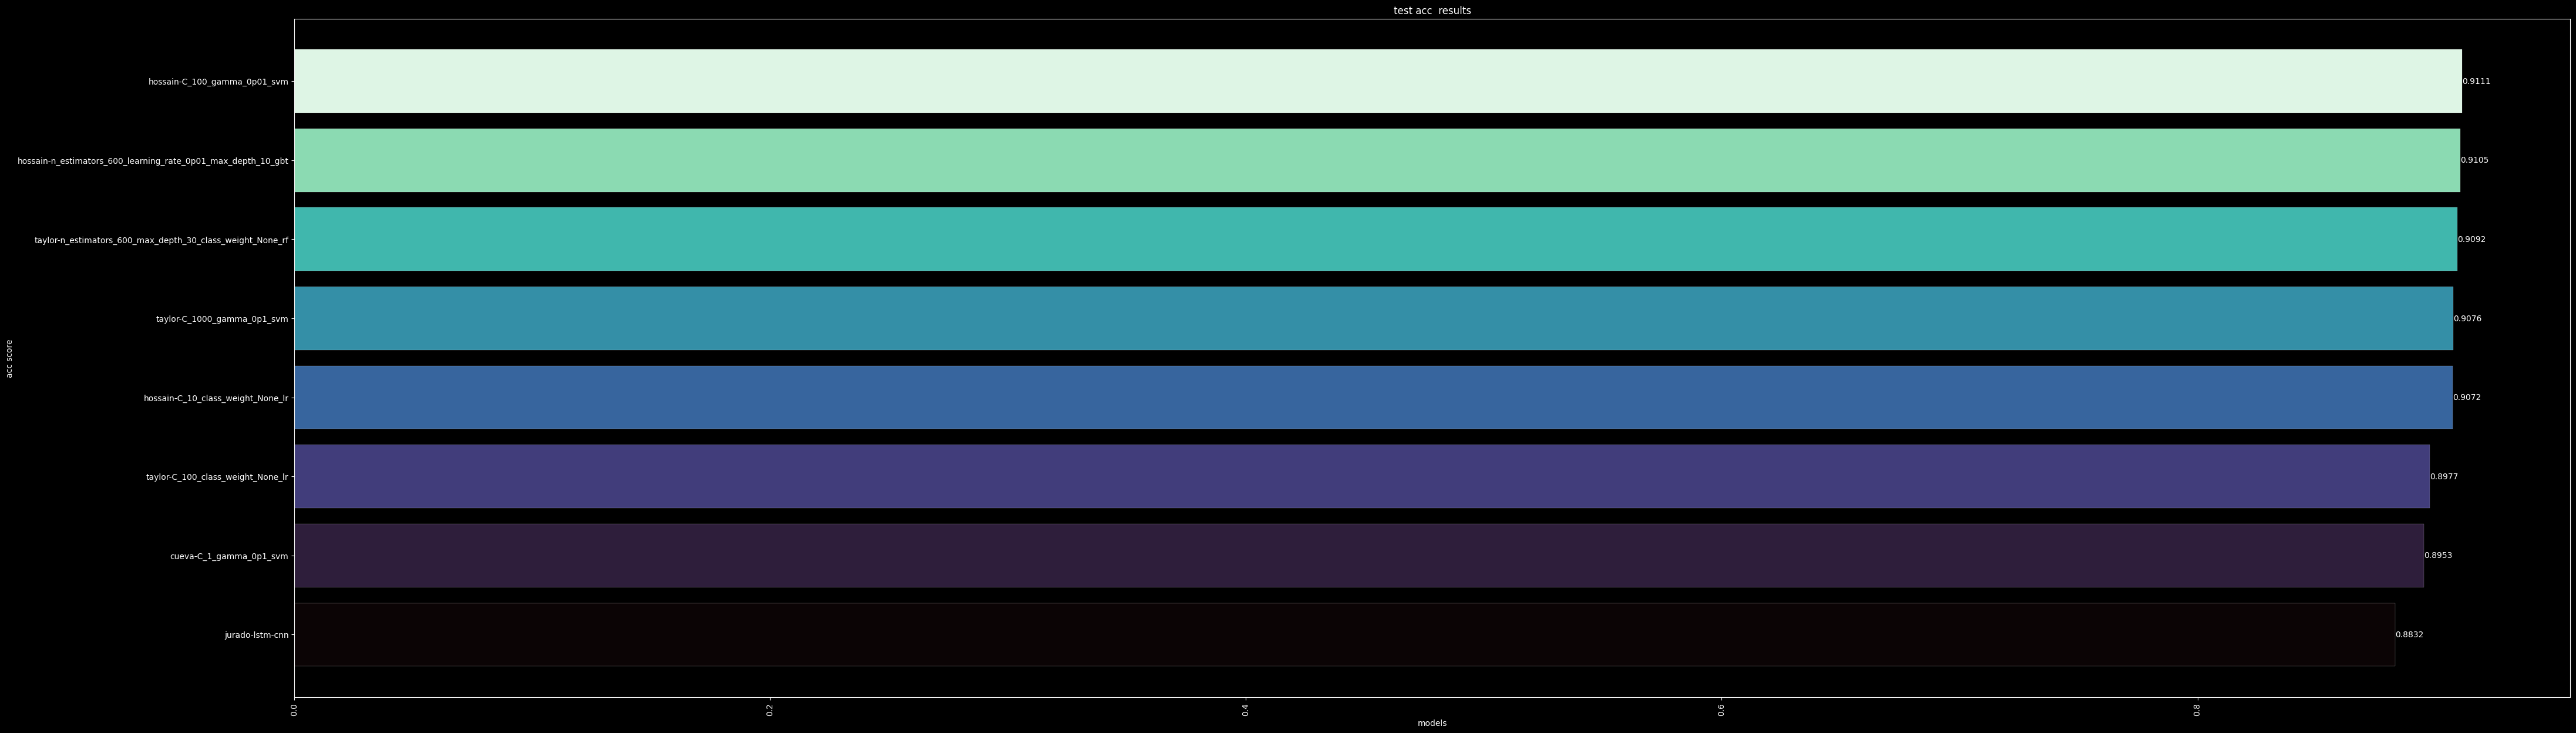

data split: test
metric: prec


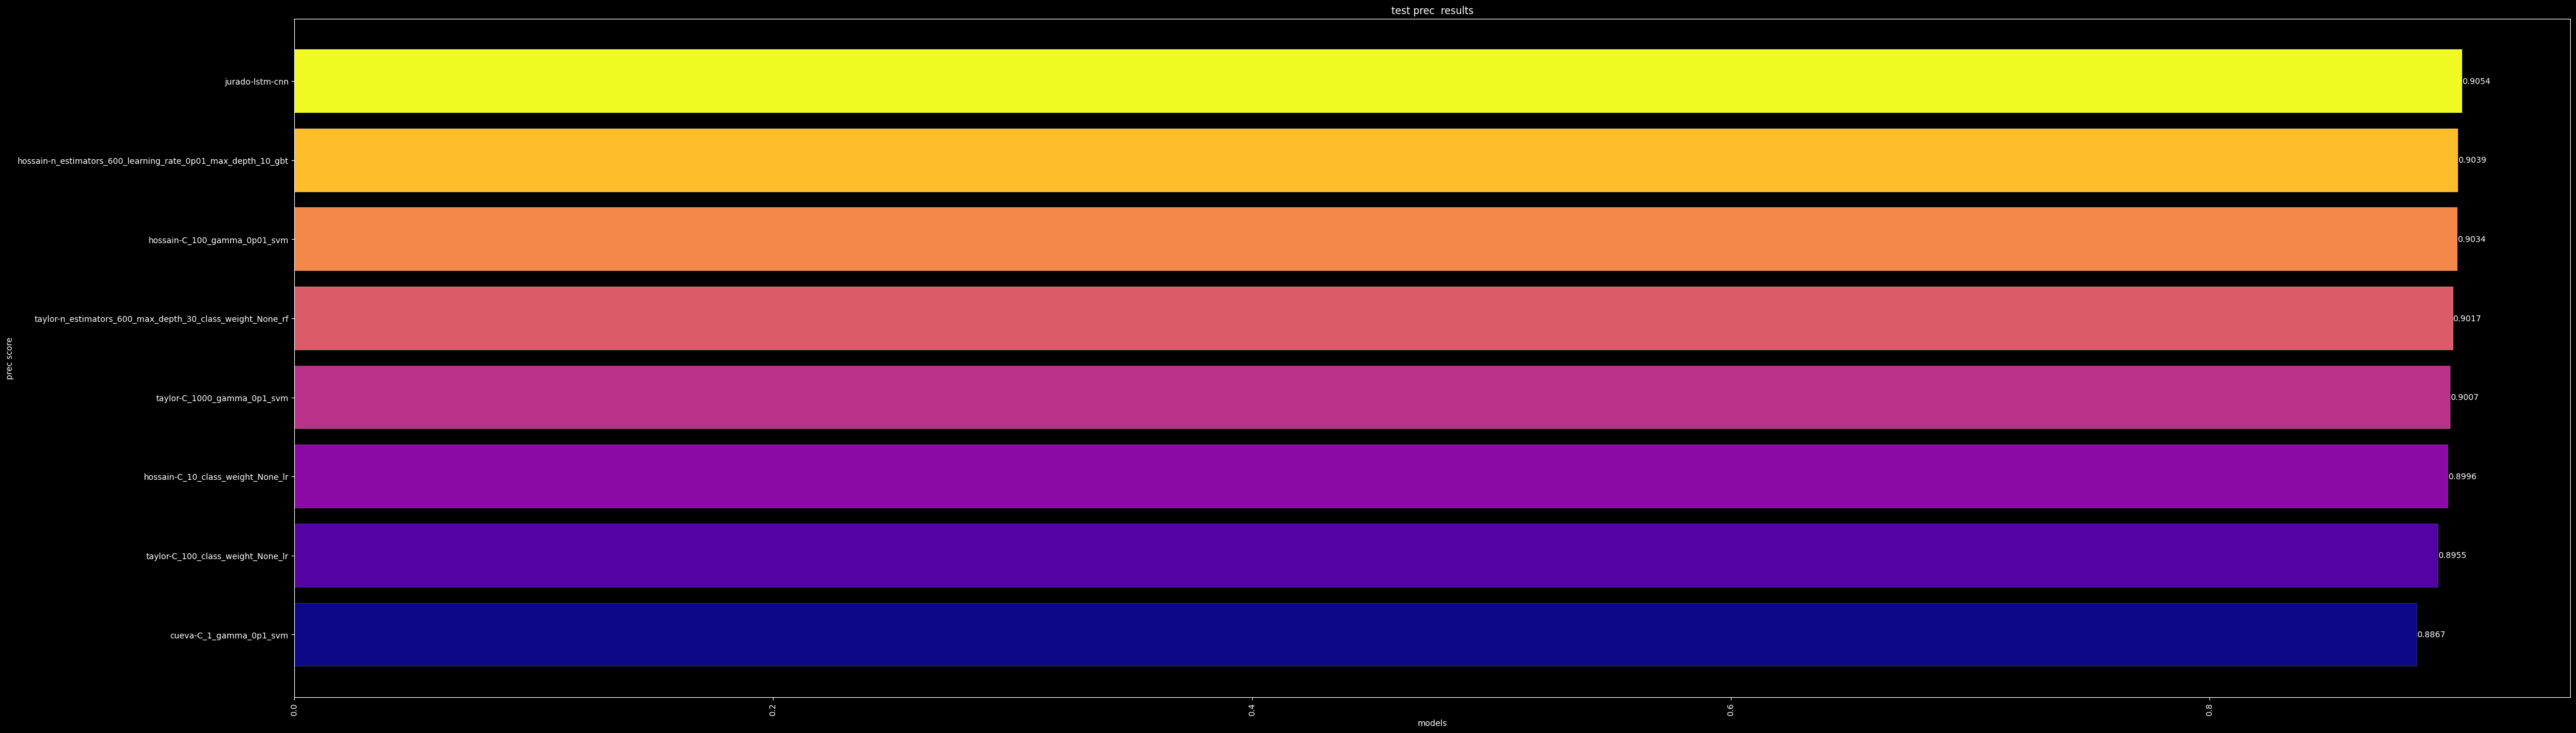

data split: test
metric: rec


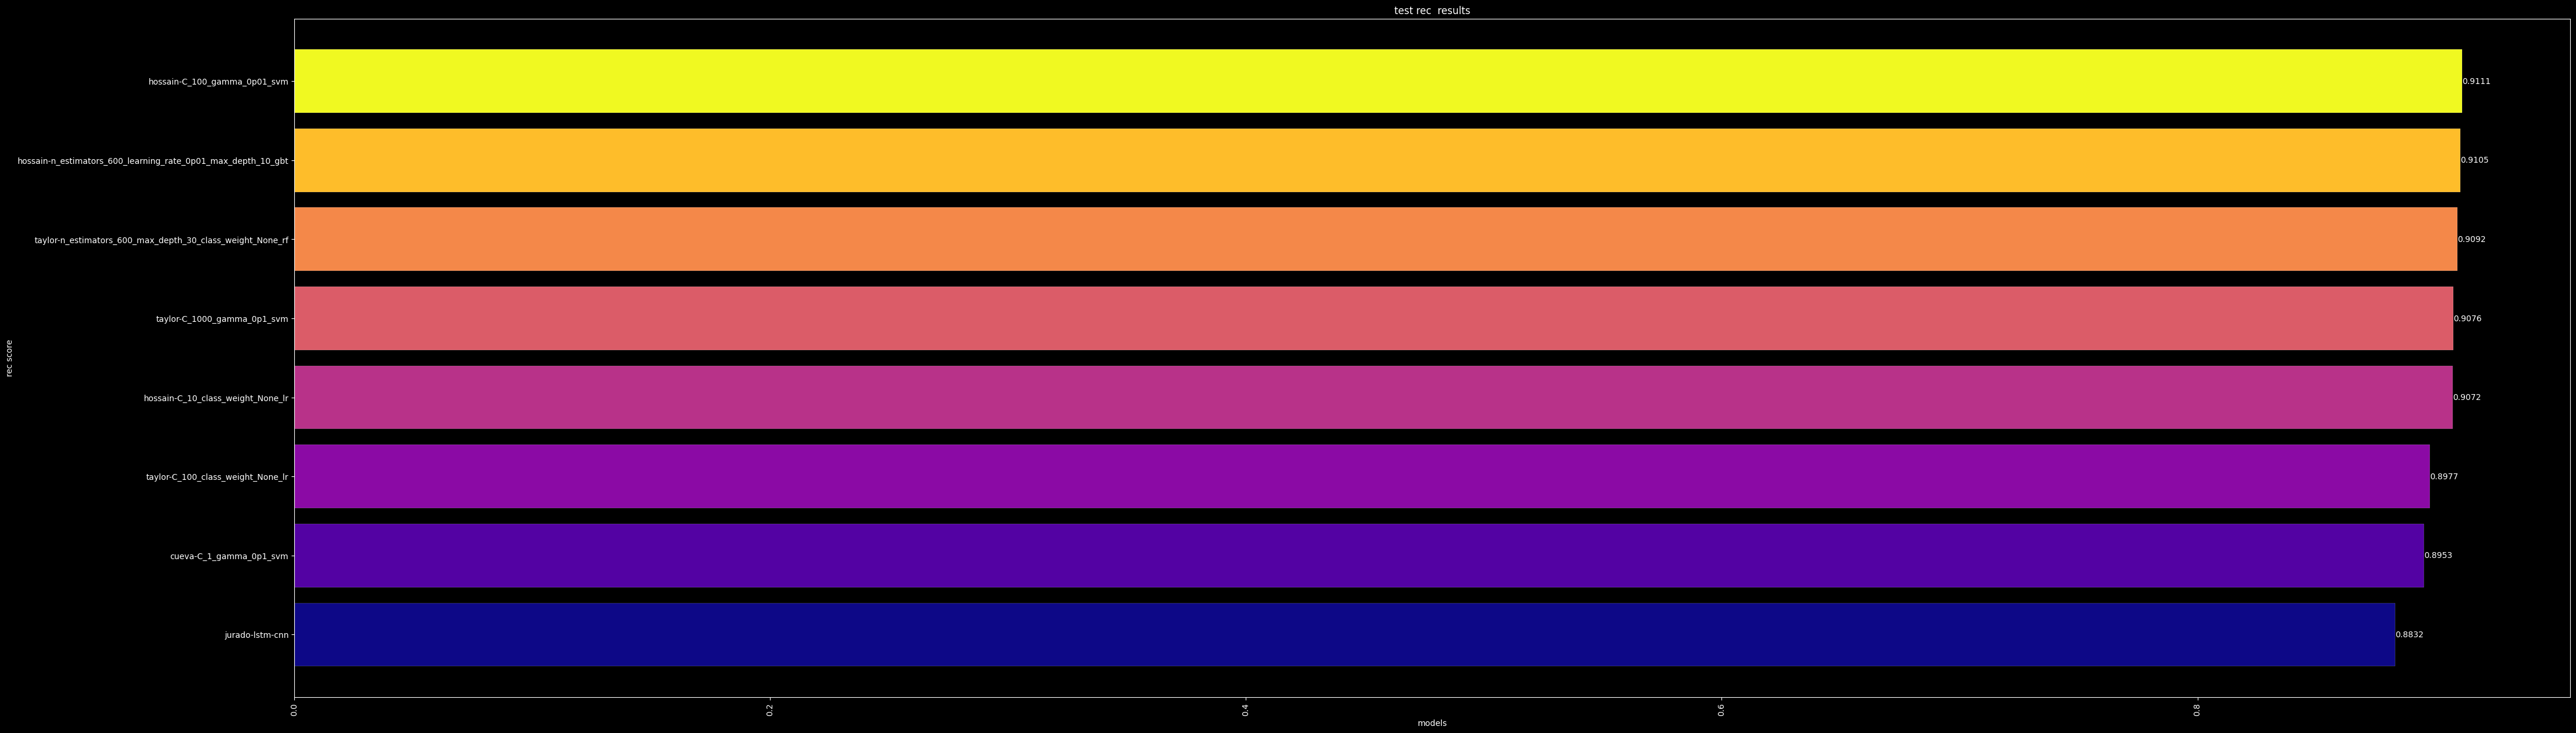

data split: test
metric: f1


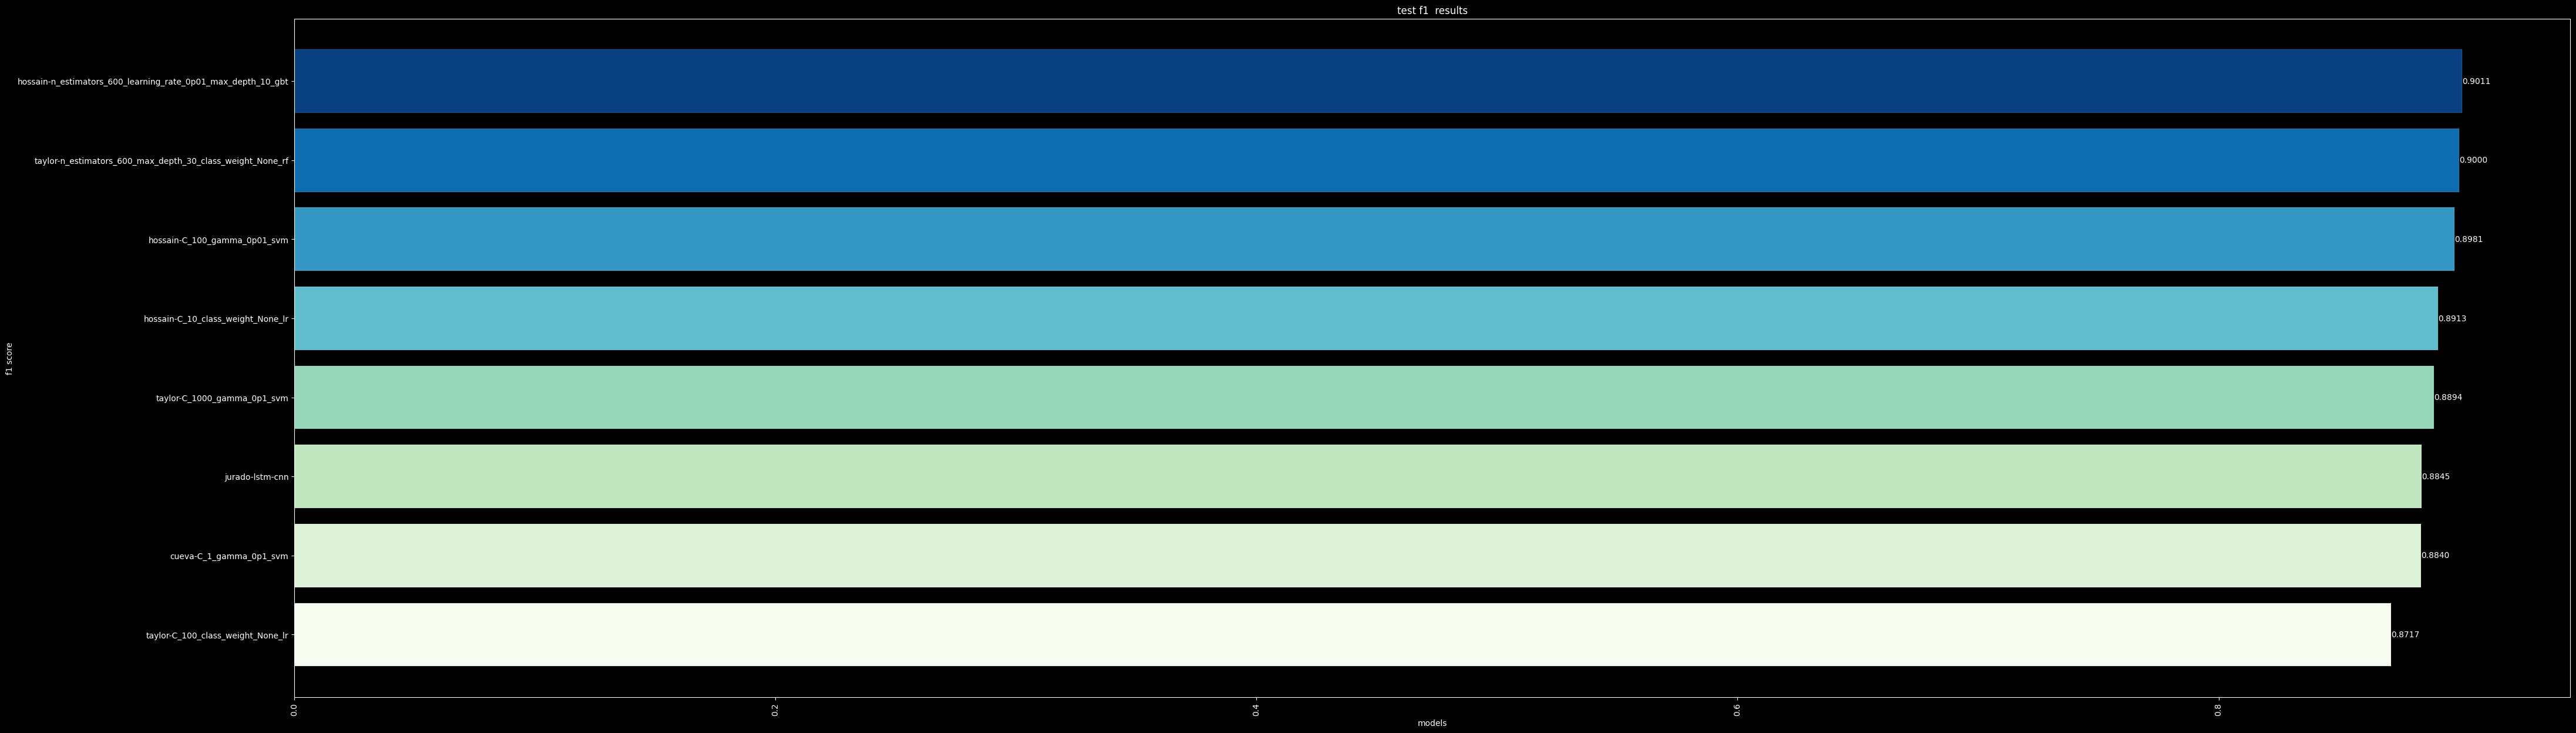

data split: test
metric: roc_auc


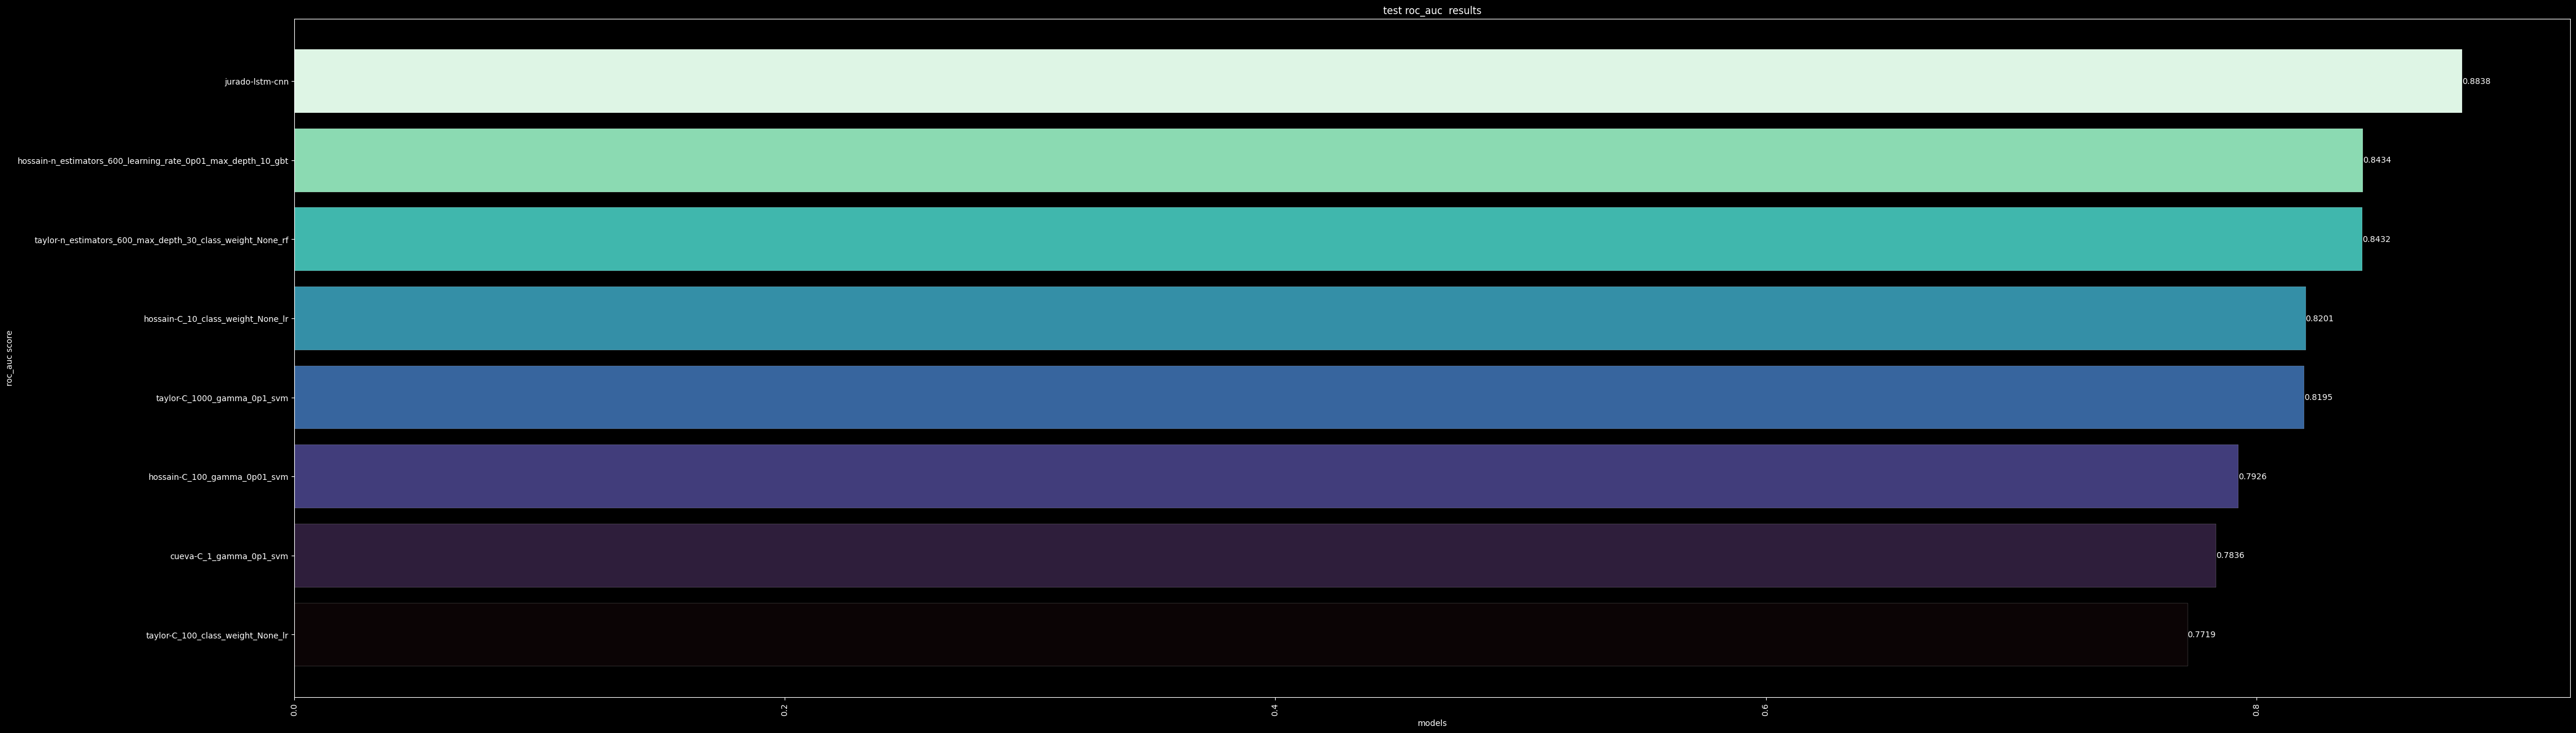

data split: test
metric: tpr


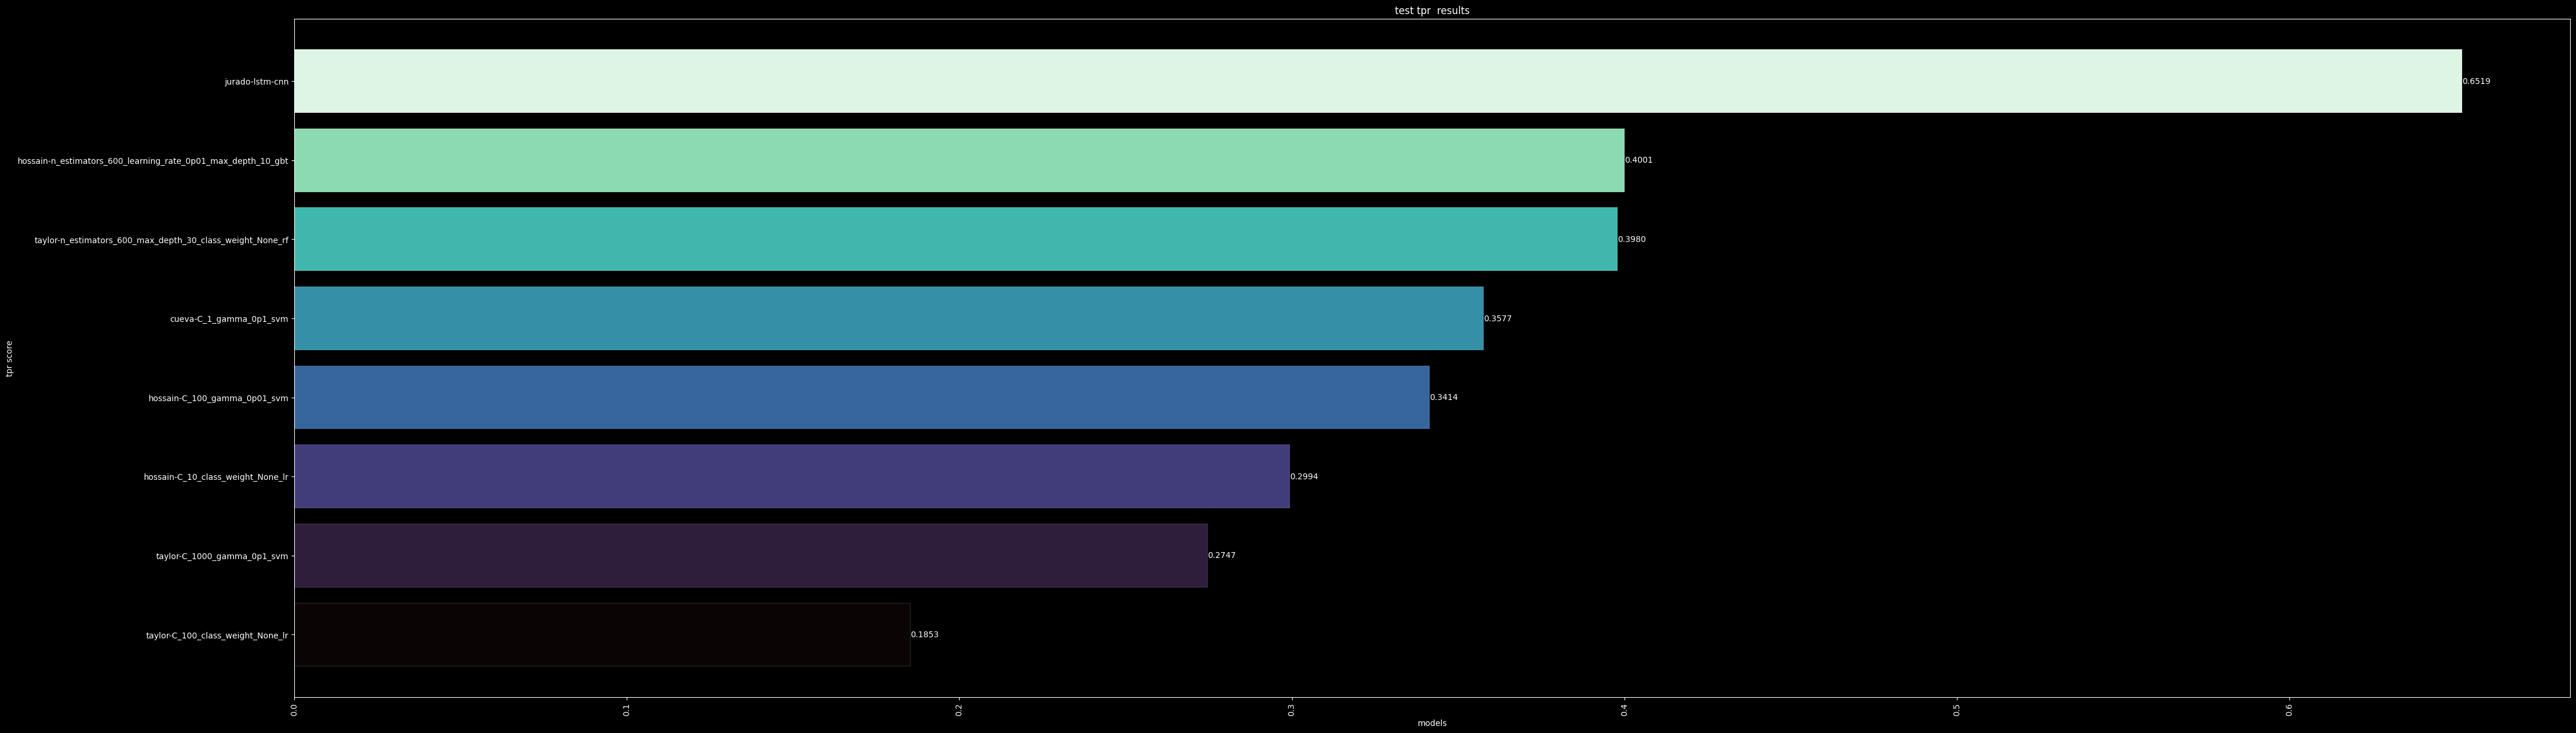

data split: test
metric: tnr


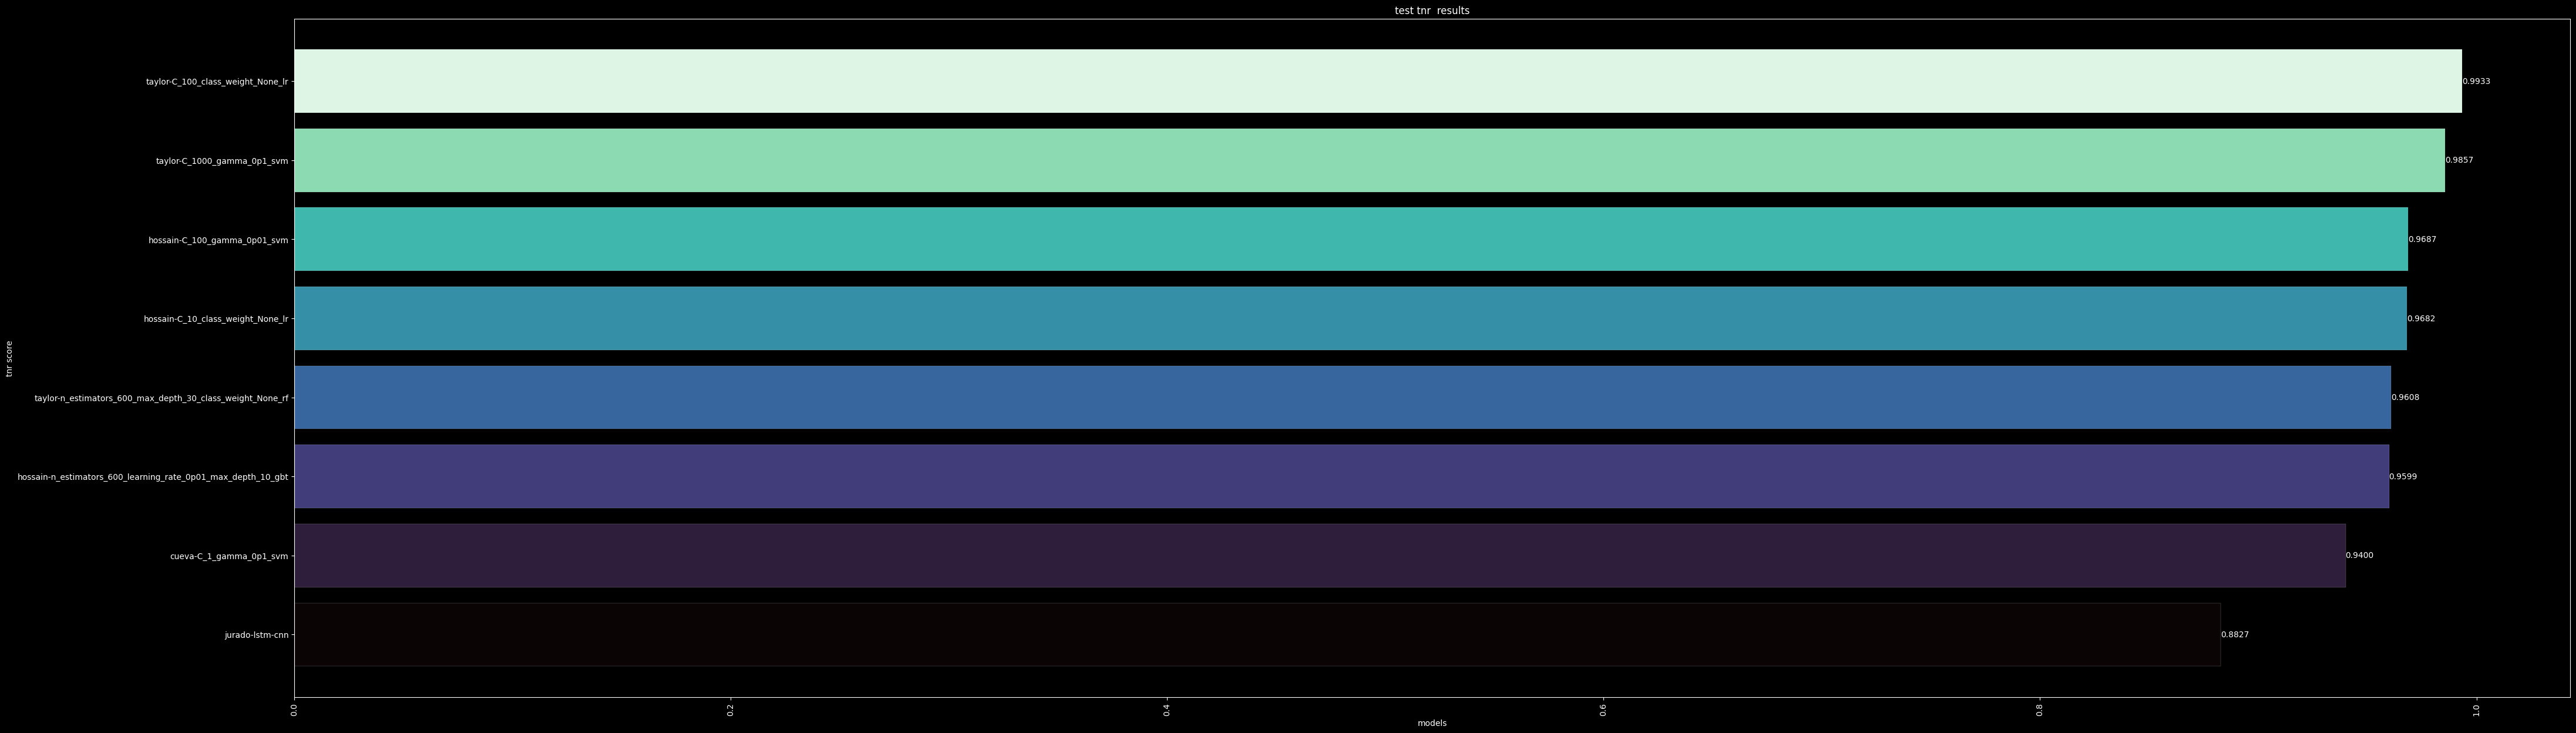

data split: test
metric: conf_matrix
conf matrix mean: [[10911.7   528.3]
 [  831.6   814.6]]
conf matrix mean: [[11084.5   365.7]
 [  799.2   846.8]]
conf matrix mean: [[11083.4   366.8]
 [  816.1   829.9]]
conf matrix mean: [[11313.2   137. ]
 [ 1063.4   582.6]]
conf matrix mean: [[11175.9   274.3]
 [  882.2   763.8]]
conf matrix mean: [[11376.7    73.5]
 [ 1253.    393. ]]
conf matrix mean: [[11180.6   269.6]
 [  934.9   711.1]]
conf matrix mean: [[10345.2  1094.8]
 [  419.9  1226.3]]


In [70]:
handpick_best(model_names, data_splits, metrics, colormaps, hp_comparison=False)